<a href="https://colab.research.google.com/github/Scottymichaelmillerguy/preprocessing-elements-to-train-better-models/blob/main/preprocessing_techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preprocessing Techniques

## From ML Algorithms to GenAI by Aman Kharwal

Here is an example of how to use measure of central tendency in filling missing in a dataset

### Imputation

In [3]:
import pandas as pd
import numpy as np

# Creating a sample data
data = pd.DataFrame({'Height' : [160, 170, np.nan, 180, 175, np.nan, 165, 172, 168]})

# calculating mean, median, and mode of the height feature
mean_height = data['Height'].mean()
median_height = data['Height'].median()
mode_height = data['Height'].mode().values[0]

# using mean height to fill missing values
data['Height']=data['Height'].fillna(mean_height)

### Outliers

Let's create a sample dataset with outliers and detect and remove them using Python

In [4]:
import numpy as np
import pandas as pd

# Create a sample dataset with outliers
np.random.seed(42)
data = pd.DataFrame({
    'Feature_A' : np.random.normal(loc = 50, scale=10, size=100),
    'Feature_B' : np.random.normal(loc=100, scale=20, size=100)
})

# Add some outliers to the dataset
data.iloc[5, 0] = 500
data.iloc[20, 1] = 200
data.iloc[35, 1] = 250

# Function to detect and remove outliers using IQR method
def remove_outliers_iqr(data, threshold=1.5):
  Q1 = data.quantile(0.25)
  Q3 = data.quantile(0.75)
  IQR = Q3 - Q1
  filtered_data = data[~((data < (Q1 - threshold * IQR)) | (data > (Q3 + threshold * IQR)).any(axis=1))]
  return filtered_data, data[~data.index.isin(filtered_data.index)]

# Detect and remove outliers using IQR method
filtered_data = remove_outliers_iqr(data)

### Feature Selection

Let's implement the Univariant Feature Selection technique using Python

In [5]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectKBest, f_classif

# Load the Breast Cancer Wisconsin (Diagnostic) dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns = data.feature_names)
y = data.target

# Select the top 5 features using Univariate Feature Selection
k = 5 # Set the number of the top features you want to select
selector = SelectKBest(score_func = f_classif, k=k)
X_selected = selector.fit_transform(X, y)

# Get the indices of the selected features
selected_indices = np.argsort(selector.scores_)[::-1][:k]
selected_features= X.columns[selected_indices]

# Print the selected features
print("Selected Features:")
print(selected_features)

Selected Features:
Index(['worst concave points', 'worst perimeter', 'mean concave points',
       'worst radius', 'mean perimeter'],
      dtype='object')


### Principal Component Analysis

In [7]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Create a high-dimensional dataset with 1000 samples and 50 features
np.random.seed(42)
n_samples = 1000
n_features = 50
X_high_dim = np.random.rand(n_samples, n_features)

# Perform PCA with two principal components
n_components = 2
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_high_dim)


Now let's create a figure with two subplots to compare the original data and the PCA-reduced data visually

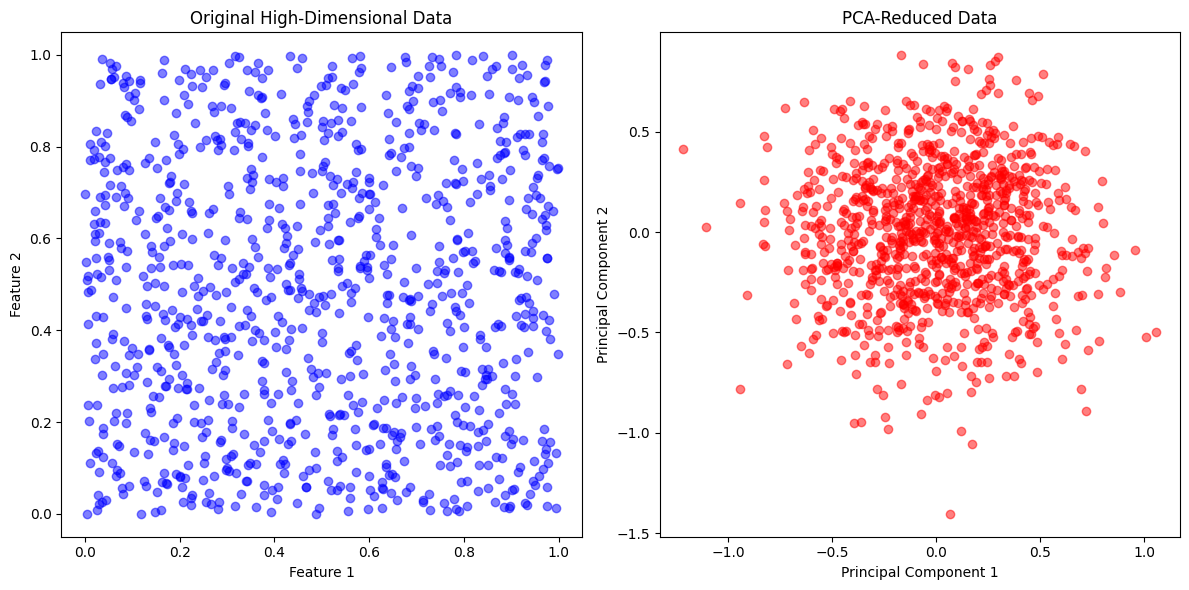

In [10]:
# Create a figure and axes for subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot the original high-dimension data
axs[0].scatter(X_high_dim[:, 0], X_high_dim[:, 1], c='blue', alpha=0.5)
axs[0].set_xlabel('Feature 1')
axs[0].set_ylabel('Feature 2')
axs[0].set_title('Original High-Dimensional Data')

# Plot the PCA-reduced data
axs[1].scatter(X_pca[:, 0], X_pca[:, 1], c='red', alpha=0.5)
axs[1].set_xlabel('Principal Component 1')
axs[1].set_ylabel('Principal Component 2')
axs[1].set_title('PCA-Reduced Data')

# Shopw the subplots
plt.tight_layout()
plt.show()

### Feature Scaling Standardization (Z-Score normalization) & Normalization (Min-Max scaling)

Lets implement Standardization and Normalizaton using Python

In [13]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Create a sample dataframe with features
data = pd.DataFrame({
    'Feature_A' : [10, 20, 30, 40, 50],
    'Feautre_B' : [100, 200, 300, 400, 500],
    'Feature_C' : [2, 4, 6, 8, 10]
})

scaler_standard = StandardScaler()
X_standardized = scaler_standard.fit_transform(data)

# Normalization
scaler_minmax = MinMaxScaler()
X_normalized = scaler_minmax.fit_transform(X)

# Print the first few rows of the scaled data
print("Original Data:")
print(X.head())

print("\nStandardized Data:")
print(pd.DataFrame(X_standardized, columns=data.columns).head())

print("\nNormalized Data")
print(pd.DataFrame(X_normalized, columns=X.columns).head())

Original Data:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter 

### Hyperparameter Tuning

Let's implement Grid Search and Random Search Using Python

In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

# Define the hyperparameter grid for Grid Search
param_grid = {
    'n_estimators' : [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split' : [2, 5, 10],
}

# Perform Grid Search with Random Forest Classifier
rf_classifier = RandomForestClassifier()
grid_search = GridSearchCV(rf_classifier, param_grid, cv = 3)
grid_search.fit(X,y)

# Print the best hyperparameter values form Grid Search
print("Best Hyperparameters from Grid Search:")
print(grid_search.best_params_)

# Perform Random Search with Random Forest Classifier
random_search = RandomizedSearchCV(rf_classifier,
                                   param_distributions=param_grid,
                                   n_iter=10, cv=3)
random_search.fit(X,y)

# Print the best hyperparameter values from Random Search
print("\nBest Hyperparameters from Random Search:")
print(random_search.best_params_)

Best Hyperparameters from Grid Search:
{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}

Best Hyperparameters from Random Search:
{'n_estimators': 50, 'min_samples_split': 10, 'max_depth': 5}


### SMOTE

In [15]:
pip install imbalanced-learn

now here is how to implement SMOTE using Python

In [16]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE

# Create a sample imbalanced dataset with two classes (0 and 1)
np.random.seed(42)
X = np.random.rand(100, 2)
y = np.array([0] * 90 + [1] * 10)

# Apply SMOTE to generate synthetic samples for the minority class
smote = SMOTE(sampling_strategy='auto')
X_resampled, y_resampled = smote.fit_resample(X, y)

# Print the class distribution after SMOTE
print("Class Distribution after SMOTE:")
print(pd.Series(y_resampled).value_counts())

Class Distribution after SMOTE:
0    90
1    90
Name: count, dtype: int64
